### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

#### First of all, we clean and prepare data for further analysis. In the following, we clean data for Ireland's dataset.

In [2]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\ireland.csv'
ireland_df = pd.read_csv(file_path, delimiter='\t')

In [3]:
print("Ireland Dataset Info:")
print(ireland_df.info())

Ireland Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        120 non-null    object
 1   Statistic Label  120 non-null    object
 2   TLIST(A1)        120 non-null    int64 
 3   Year             120 non-null    int64 
 4   C02639V03196     120 non-null    object
 5   Days of Week     120 non-null    object
 6   UNIT             120 non-null    object
 7   VALUE            120 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.6+ KB
None


In [4]:
ireland_df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196',
       'Days of Week', 'UNIT', 'VALUE'],
      dtype='object')

In [5]:
print(ireland_df.head())

  STATISTIC        Statistic Label  TLIST(A1)  Year C02639V03196 Days of Week  \
0  TOA02C01  Average Red Line Flow       2018  2018            -     All days   
1  TOA02C01  Average Red Line Flow       2018  2018            1       Sunday   
2  TOA02C01  Average Red Line Flow       2018  2018            2       Monday   
3  TOA02C01  Average Red Line Flow       2018  2018            3      Tuesday   
4  TOA02C01  Average Red Line Flow       2018  2018            4    Wednesday   

     UNIT   VALUE  
0  Number  419947  
1  Number   34860  
2  Number   60673  
3  Number   65632  
4  Number   67364  


In [6]:
ireland_df = ireland_df.dropna()
ireland_df = ireland_df.drop_duplicates()
ireland_df.columns = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196', 'Days of Week', 'UNIT', 'VALUE']
ireland_df['Year'] = pd.to_numeric(ireland_df['Year'], errors='coerce')
ireland_df['VALUE'] = pd.to_numeric(ireland_df['VALUE'], errors='coerce')
print("\nCleaned Ireland Dataset:")
ireland_df.to_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv', index=False)


Cleaned Ireland Dataset:


#### The following code shows the cleaning process for Australia's dataset.

In [7]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\australia.csv'

In [8]:
column_dtype = {'TripID': str}

In [9]:
# Specify dtype and low_memory parameters to address DtypeWarning
aus_df = pd.read_csv(file_path,  dtype = column_dtype, low_memory=False)
print("Original Australia Dataset Info:")
print(aus_df.info())

Original Australia Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  object
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None


In [10]:
aus_df['WeekBeginning'] = pd.to_datetime(aus_df['WeekBeginning'], errors='coerce')
aus_df = aus_df.dropna()
aus_df = aus_df.drop_duplicates()

In [11]:
print("\nCleaned Australia Dataset:")
print(aus_df.head())


Cleaned Australia Dataset:
  TripID RouteID  StopID                    StopName WeekBeginning  \
0  23631     100   14156                181 Cross Rd    2013-06-30   
1  23631     100   14144                177 Cross Rd    2013-06-30   
2  23632     100   14132                175 Cross Rd    2013-06-30   
3  23633     100   12266  Zone A Arndale Interchange    2013-06-30   
4  23633     100   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1  


In [12]:
cleaned_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv'
aus_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv


#### To visualize the datasets, we implement the following code for both datasets.

In [13]:
#Load the Australian dataset with specified data types
aus_dtype = {'RouteID': 'object', 'StopID': 'object', 'NumberOfBoardings': 'int'}
aus_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv', dtype=aus_dtype, parse_dates=['WeekBeginning'], low_memory=False)

In [14]:
# Load the Ireland dataset
ireland_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv')

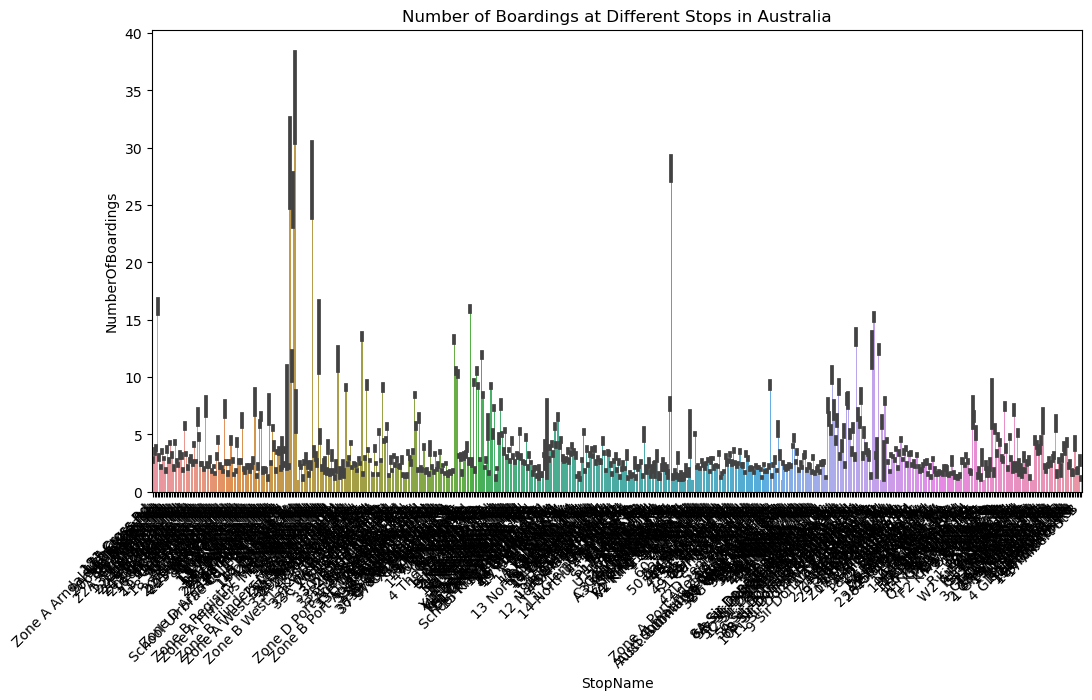

In [15]:
# Visualize the Australian dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='StopName', y='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings at Different Stops in Australia')
plt.xticks(rotation=45, ha='right')
plt.show()

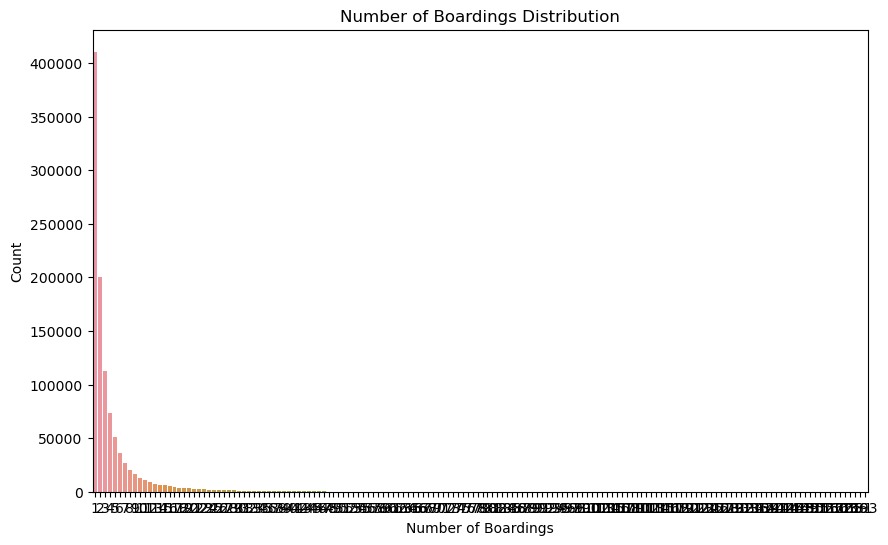

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings Distribution')
plt.xlabel('Number of Boardings')
plt.ylabel('Count')
plt.show()

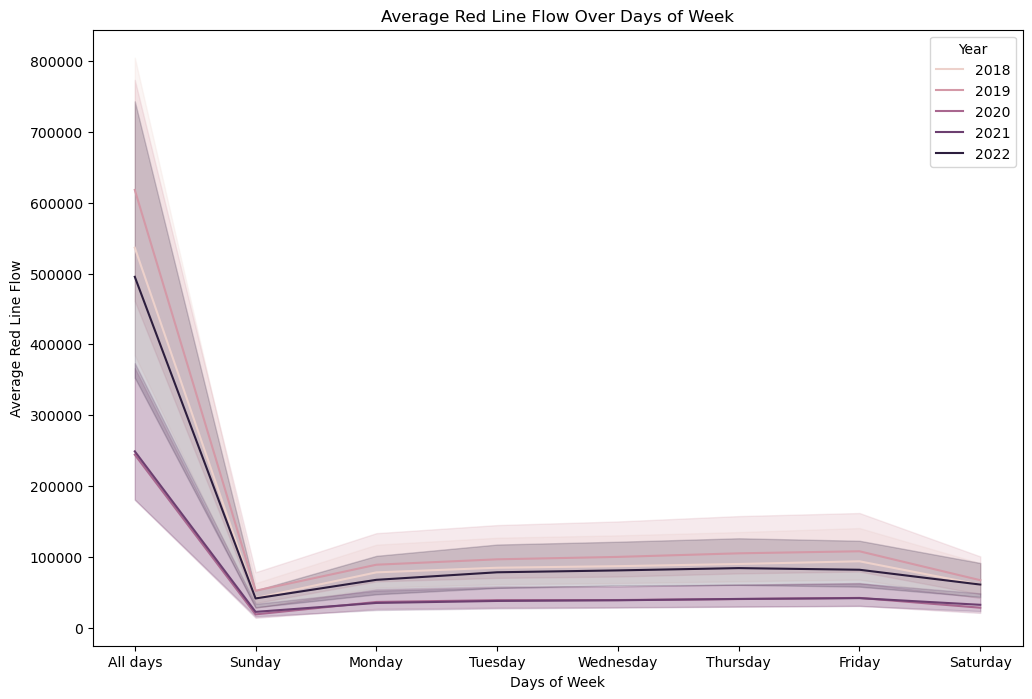

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Days of Week', y='VALUE', hue='Year', data=ireland_df)
plt.title('Average Red Line Flow Over Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Average Red Line Flow')
plt.show()

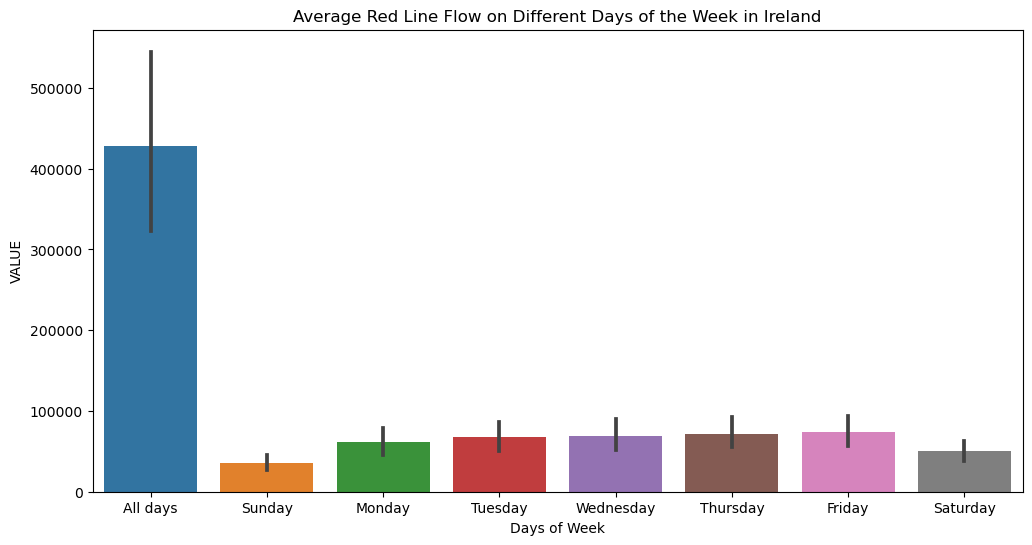

In [18]:
# Visualize the Ireland dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Days of Week', y='VALUE', data=ireland_df)
plt.title('Average Red Line Flow on Different Days of the Week in Ireland')
plt.show()